In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline

In [2]:
(xtrain,ytrain), (xtest,ytest) = keras.datasets.mnist.load_data()
len(xtrain)

60000

In [3]:
xtrain[0].shape

(28, 28)

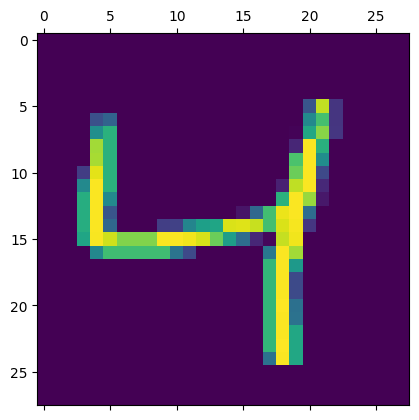

In [4]:
plt.matshow(xtrain[2])

In [6]:
xtrain= xtrain/255
xtest= xtest/255

In [7]:
xtrain_flattened = xtrain.reshape(len(xtrain),28*28)
xtest_flattened = xtest.reshape(len(xtest),28*28)
xtrain_flattened.shape

(60000, 784)

In [8]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])
model.compile(
    optimizer = 'adam',
    loss='sparse_categorical_crossentropy',
    metrics =['accuracy']
)

model.fit(xtrain_flattened, ytrain, epochs=5)

C:\Users\EDWIN\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.4595 - loss: 2.2445
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7038 - loss: 2.0283
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7304 - loss: 1.8347
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7573 - loss: 1.6637
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7710 - loss: 1.5173


In [9]:
#evaluate a model accuracy on the test data set
model.evaluate(xtest_flattened,ytest)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7747 - loss: 1.4578    


[1.403968095779419, 0.8029999732971191]

In [10]:
ypredicted = model.predict(xtest_flattened)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [11]:
ypredicted[0]

array([0.31418866, 0.4003369 , 0.35324258, 0.41789603, 0.47505558,
       0.38286483, 0.28866062, 0.8077096 , 0.37621593, 0.57647514],
      dtype=float32)

In [12]:
#to get the actual prediction
np.argmax(ypredicted[0])

np.int64(7)

In [13]:
ytest[0]

np.uint8(7)

In [14]:
ypredicted = [np.argmax(i) for i in ypredicted]

In [15]:
#confusion matrix in tensorflow
cm = tf.math.confusion_matrix(labels=ytest, predictions=ypredicted)

Text(70.72222222222221, 0.5, 'True')

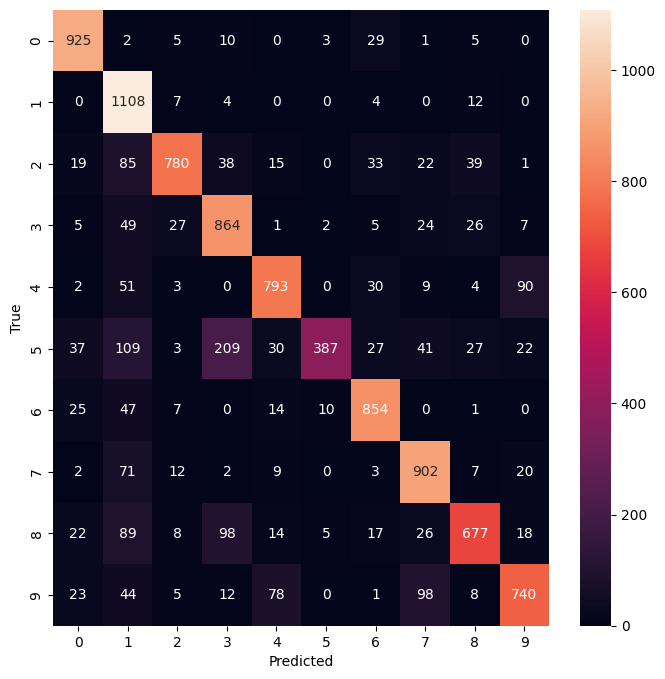

In [16]:
import seaborn as sn
plt.figure(figsize=[8,8])
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')

In [18]:
#flatten the data using keras layeres
#add a hidden layer
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])
model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics =['accuracy']
)
#because of the flattening layer we just add our xtrain
model.fit(xtrain,ytrain, epochs=5)

C:\Users\EDWIN\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.5747 - loss: 1.7149
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8585 - loss: 0.5658
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8878 - loss: 0.4131
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8992 - loss: 0.3622
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9048 - loss: 0.3362


In [19]:
model.evaluate(xtest,ytest)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8976 - loss: 0.3530    


[0.3105010986328125, 0.9118000268936157]

In [20]:
ypred = model.predict(xtest)
ypred = [np.argmax(i) for i in ypred]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step  


In [21]:
print(ytest[:10])
ypred[:10]

[7 2 1 0 4 1 4 9 5 9]


[np.int64(7),
 np.int64(2),
 np.int64(1),
 np.int64(0),
 np.int64(4),
 np.int64(1),
 np.int64(4),
 np.int64(9),
 np.int64(6),
 np.int64(9)]

Text(95.72222222222221, 0.5, 'True')

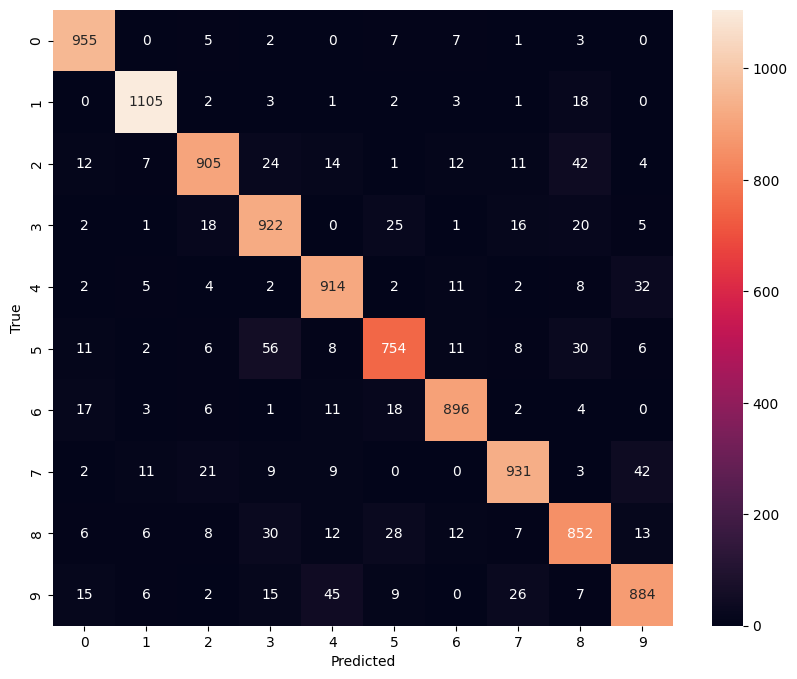

In [22]:
cm = tf.math.confusion_matrix(labels=ytest, predictions=ypred)
plt.figure(figsize=[10,8])
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')